## Live Code: Python Dictionary

As we mentioned earlier, one of the most popular forms of python dictionaries you'll run across as you work is __JSON__ ([JavaScript Object Notation](https://www.json.org/json-en.html)). JSON is the primary format in which data is passed back and forth to APIs ([Application Programming Interface](https://medium.com/@perrysetgo/what-exactly-is-an-api-69f36968a41f)), and most API servers will send their responses in JSON format. Python has great JSON support, with the json package. We won't learn about calling APIs today (*stay tuned for week 6!*) but to get started, we'll play around with a snippet of a call result from the [New York Times Most Popular API]('https://developer.nytimes.com/docs/most-popular-product/1/overview').

In [1]:
# import requests and json - needed to make an API call
import requests
import json

authorized_key = "wuVWLTGSwdIknOmyb5xgYHQf7q2GHaKi" # if you want to play around with the API, please make your own key at https://developer.nytimes.com/
day = str(7) # this particular API requires you to choose from 1, 7, 30 (past day, 7 days, 30 days)

# API url for the most emailed articles over a day, past 7 days or 30 days
# we are getting the results for the past 7 days
api_url = "https://api.nytimes.com/svc/mostpopular/v2/emailed/%s.json?api-key=%s" %(day, authorized_key) 
print(api_url)

https://api.nytimes.com/svc/mostpopular/v2/emailed/7.json?api-key=wuVWLTGSwdIknOmyb5xgYHQf7q2GHaKi


In [2]:
# calling the API with requests
response = requests.get(api_url)
# creating a variable called data to hold the json formatted result
data = response.json()

In [3]:
# show raw data
print(type(data))
data

<class 'dict'>


{'status': 'OK',
 'copyright': 'Copyright (c) 2020 The New York Times Company.  All Rights Reserved.',
 'num_results': 20,
 'results': [{'uri': 'nyt://article/cf3d51df-5f8b-5ae5-b439-5371f10d56b1',
   'url': 'https://www.nytimes.com/2020/06/09/well/live/coronavirus-rules-pandemic-infection-prevention.html',
   'id': 100000007152805,
   'asset_id': 100000007152805,
   'source': 'New York Times',
   'published_date': '2020-06-09',
   'updated': '2020-06-14 07:12:54',
   'section': 'Well',
   'subsection': 'Live',
   'nytdsection': 'well',
   'adx_keywords': 'Coronavirus (2019-nCoV);Quarantines;Contact Tracing (Public Health);Tests (Medical);Coronavirus Reopenings;Masks;Hygiene and Cleanliness;Supermarkets and Grocery Stores;Coronavirus Risks and Safety Concerns;Content Type: Service;Disease Rates',
   'column': None,
   'byline': 'By Tara Parker-Pope',
   'type': 'Article',
   'title': '5 Rules to Live By During a Pandemic',
   'abstract': 'There’s no playbook for living through a pandem

In [4]:
# we want to look at one article from the 20 returned
# all the information is stored in the key, 'results'
# results maps to a list of dictionaries that contain the article metadata
# so you will need to use an index number to access the dictionary you want
# the API is constantly updated so you may get different results each time you access it
article = data['results'][9]
article

{'uri': 'nyt://article/9ec9a593-a171-5336-ae8b-30620b6e3b42',
 'url': 'https://www.nytimes.com/2020/06/08/opinion/george-floyd-protests-race.html',
 'id': 100000007176565,
 'asset_id': 100000007176565,
 'source': 'New York Times',
 'published_date': '2020-06-08',
 'updated': '2020-06-09 15:39:01',
 'section': 'Opinion',
 'subsection': '',
 'nytdsection': 'opinion',
 'adx_keywords': 'George Floyd Protests (2020);Black Lives Matter Movement;Police Brutality, Misconduct and Shootings;Criminal Justice;Black People;Race and Ethnicity;Budgets and Budgeting;Socialism (Theory and Philosophy);Income Inequality;United States Politics and Government;United States',
 'column': None,
 'byline': 'By Michelle Alexander',
 'type': 'Article',
 'title': 'America, This Is Your Chance',
 'abstract': 'We must get it right this time or risk losing our democracy forever.',
 'des_facet': ['George Floyd Protests (2020)',
  'Black Lives Matter Movement',
  'Police Brutality, Misconduct and Shootings',
  'Crimin

In [5]:
# get url
article['url']

'https://www.nytimes.com/2020/06/08/opinion/george-floyd-protests-race.html'

In [6]:
# get title
article['title']

'America, This Is Your Chance'

In [7]:
# get byline
article['byline']

'By Michelle Alexander'

In [8]:
# get description tags and iterate through them
tags = article['des_facet']
for tag in tags:
    print(tag)

George Floyd Protests (2020)
Black Lives Matter Movement
Police Brutality, Misconduct and Shootings
Criminal Justice
Black People
Race and Ethnicity
Budgets and Budgeting
Socialism (Theory and Philosophy)
Income Inequality
United States Politics and Government


In [9]:
# add a key read_or_not with a boolean value
article['read_or_not'] = True

# check to see that 'read_or_not' has been added
article

{'uri': 'nyt://article/9ec9a593-a171-5336-ae8b-30620b6e3b42',
 'url': 'https://www.nytimes.com/2020/06/08/opinion/george-floyd-protests-race.html',
 'id': 100000007176565,
 'asset_id': 100000007176565,
 'source': 'New York Times',
 'published_date': '2020-06-08',
 'updated': '2020-06-09 15:39:01',
 'section': 'Opinion',
 'subsection': '',
 'nytdsection': 'opinion',
 'adx_keywords': 'George Floyd Protests (2020);Black Lives Matter Movement;Police Brutality, Misconduct and Shootings;Criminal Justice;Black People;Race and Ethnicity;Budgets and Budgeting;Socialism (Theory and Philosophy);Income Inequality;United States Politics and Government;United States',
 'column': None,
 'byline': 'By Michelle Alexander',
 'type': 'Article',
 'title': 'America, This Is Your Chance',
 'abstract': 'We must get it right this time or risk losing our democracy forever.',
 'des_facet': ['George Floyd Protests (2020)',
  'Black Lives Matter Movement',
  'Police Brutality, Misconduct and Shootings',
  'Crimin

In [10]:
# let's remove the two keys with empty lists: 'org_facet', 'per_facet'
# remove key/value using pop() & keyword del
article.pop('org_facet')
del article['per_facet']

# make sure the keys are removed!
article

{'uri': 'nyt://article/9ec9a593-a171-5336-ae8b-30620b6e3b42',
 'url': 'https://www.nytimes.com/2020/06/08/opinion/george-floyd-protests-race.html',
 'id': 100000007176565,
 'asset_id': 100000007176565,
 'source': 'New York Times',
 'published_date': '2020-06-08',
 'updated': '2020-06-09 15:39:01',
 'section': 'Opinion',
 'subsection': '',
 'nytdsection': 'opinion',
 'adx_keywords': 'George Floyd Protests (2020);Black Lives Matter Movement;Police Brutality, Misconduct and Shootings;Criminal Justice;Black People;Race and Ethnicity;Budgets and Budgeting;Socialism (Theory and Philosophy);Income Inequality;United States Politics and Government;United States',
 'column': None,
 'byline': 'By Michelle Alexander',
 'type': 'Article',
 'title': 'America, This Is Your Chance',
 'abstract': 'We must get it right this time or risk losing our democracy forever.',
 'des_facet': ['George Floyd Protests (2020)',
  'Black Lives Matter Movement',
  'Police Brutality, Misconduct and Shootings',
  'Crimin

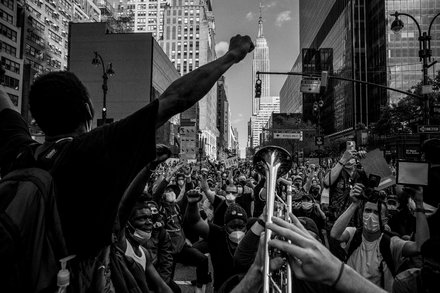

In [11]:
# use IPython & the media metadata to display an image from the returned data
# IPython (Interactive Python) is basically a command shell for interactive computing
# here we are using it to import the display module and Image class so we can see our image within our notebook
from IPython.display import Image

# Image takes three arguments: the image path/url, width, and height
# we are going to fetch all of those data from above like we did for article url, title, and byline
media_meta = article['media'][0]['media-metadata'][2] # this is the same as: data['results'][4]['media'][0]['media-metadata'][2]
url = media_meta['url'] # data['results'][4]['media'][0]['media-metadata'][2]['url']
width = media_meta['width'] # data['results'][4]['media'][0]['media-metadata'][2]['width']
height = media_meta['height'] # data['results'][4]['media'][0]['media-metadata'][2]['height']
Image(url, width=width, height=height) # plug in the correct variables in order